In [1]:
%load_ext autoreload
%autoreload 2

from base64 import b64encode
import copy
from datetime import datetime
import getopt
import io
from io import BytesIO
import os
import sys

# standard numeric/scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sps
import scipy.fftpack as fftpack 

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', figsize=(20, 12))

# image display
from PIL import Image
import IPython.display 
from IPython.display import HTML

#internal libraries which may or may not get used
import fdls
from lddutils import *

import lddecode_core as ldd

# Notebook-only functions go here

# Draws a uint16 image, downscaled to uint8
def draw_raw_bwimage(bm, x = 2800, y = 525, hscale = 1, vscale = 2, outsize = None):
    if y is None:
        y = len(bm) // x
        
    if outsize is None:
        outsize = (x * hscale, y * vscale)
    
    bmf = np.uint8(bm[0:x*y] / 256.0)
    print(bmf.shape)
    if x is not None:
        bms = (bmf.reshape(len(bmf)//x, -1))
    else:
        bms = bmf
    
    print(bms.dtype, bms.shape, bms[:][0:y].shape)
    im = Image.fromarray(bms[0:y])
    im = im.resize(outsize)
    b = BytesIO()
    im.save(b, format='png')
    return IPython.display.Image(b.getvalue())


In [2]:
matplotlib.rc('figure', figsize=(20, 12))

In [12]:
from lddecode_core import *

filename = '/mnt3/dd2/Apple Visual Almanac_CAV_NTSC_side1_2018-11-26_13-12-45.lds'
#filename = '/mnt3/dd/ve-snw_side1_6x_2018-10-13_20-45-51.lds'
#filename = '/mnt3/lair_attract.lds'
#filename = '/mnt2/ld/dd/sears.lds'
filename = '/mnt3/erica.lds'
#filename = '/mnt3/dd2/mammoth_2018-12-11_21-31-54.lds'
#filename = '/home/cpage/ld-decode.rev3/ralf_side1_6x_2018-10-09_21-41-14.lds'
filename = '/mnt3/ggv1069_side1_v2800_2018-09-28_07-33-31.lds'
#filename = '/home/cpage/Downloads/Fantasia_CAV_NTSC_side2_1200-2000_2018-12-21_18-02-13.lds'
#filename = '/mnt3/lk-80hits_19single.lds'
#filename = '/home/cpage/vbitest/Fantasia_CAV_NTSC_side3_18200-18300_2018-11-06_09-21-07.lds'
filename = '/home/cpage/ddsftp/Domesday/Simon/LDV4300D_2 Captures/National Gallery of Art/National Gallery of Art_CAV_NTSC_side1_2018-12-12_14-57-06.lds'
#filename = '/mnt2/ld/N'

filename = '/home/cpage/ld/ggv-x9/ggvchap1.lds'
outname = 'devbook'
system = 'NTSC'
foutput = False
loader = load_packed_data_4_40

firstframe = 0
req_frames = 3

ldd = LDdecode(filename, outname, loader, frameoutput=foutput, system=system)
ldd.roughseek(firstframe * 2)
ldd.blackIRE = 7.5

#ldd.rf.mtf_mult = 1

fields = []
for i in range(0, req_frames * 2):
    fields.append(ldd.readfield())
    #ldd.processfield(fields[-1])
    
ldd.fieldinfo    

file frame 1 CAV frame 255
file frame 2 CAV frame 256


[{'isFirstField': False,
  'syncConf': 75,
  'seqNo': 1,
  'audioSamples': 799,
  'diskLoc': 0.8,
  'medianBurstIRE': 12.514989889705882,
  'dropOuts': {'fieldLine': [4, 5, 6],
   'startx': [80, 78, 80],
   'endx': [146, 144, 146]},
  'fieldPhaseID': 4,
  'decodeFaults': 0},
 {'isFirstField': True,
  'syncConf': 75,
  'seqNo': 2,
  'audioSamples': 803,
  'diskLoc': 1.8,
  'medianBurstIRE': 12.537550735294117,
  'dropOuts': {'fieldLine': [4, 5, 6, 9],
   'startx': [79, 78, 80, 457],
   'endx': [146, 144, 145, 519]},
  'fieldPhaseID': 1,
  'decodeFaults': 0},
 {'isFirstField': False,
  'syncConf': 75,
  'seqNo': 3,
  'audioSamples': 799,
  'diskLoc': 2.8,
  'medianBurstIRE': 12.529429963235295,
  'dropOuts': {'fieldLine': [4, 5, 6, 28],
   'startx': [78, 80, 78, 644],
   'endx': [144, 146, 143, 648]},
  'fieldPhaseID': 2,
  'decodeFaults': 0},
 {'isFirstField': True,
  'syncConf': 75,
  'seqNo': 4,
  'audioSamples': 802,
  'diskLoc': 3.8,
  'medianBurstIRE': 12.502272794117646,
  'dropOu

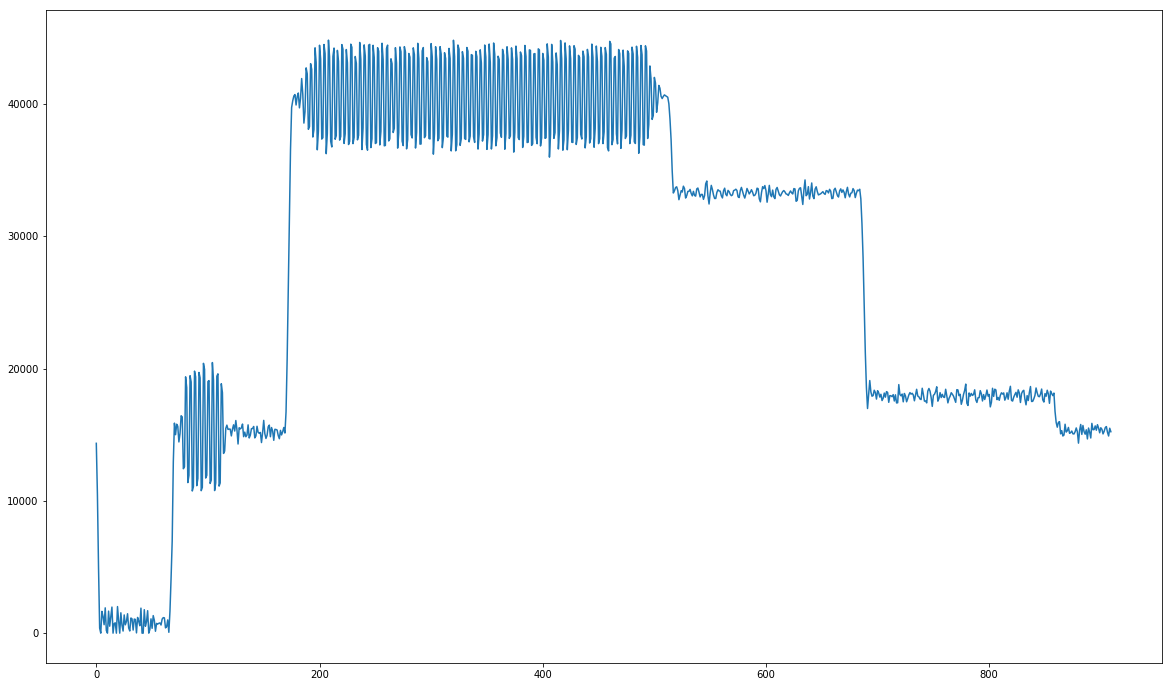

In [4]:
self = copy.deepcopy(fields[0])
self2 = copy.deepcopy(fields[1])

l = 18
plt.plot(self.dspicture[l * self.outlinelen:(l + 1) * self.outlinelen])

In [5]:
l = 18
b = int(self.linelocs[l])
e = int(self.linelocs[l+1])
#plt.plot(self.demo)

In [6]:
self.lineslice(18, 5.2, 5.5)

slice(74777, 74997, None)

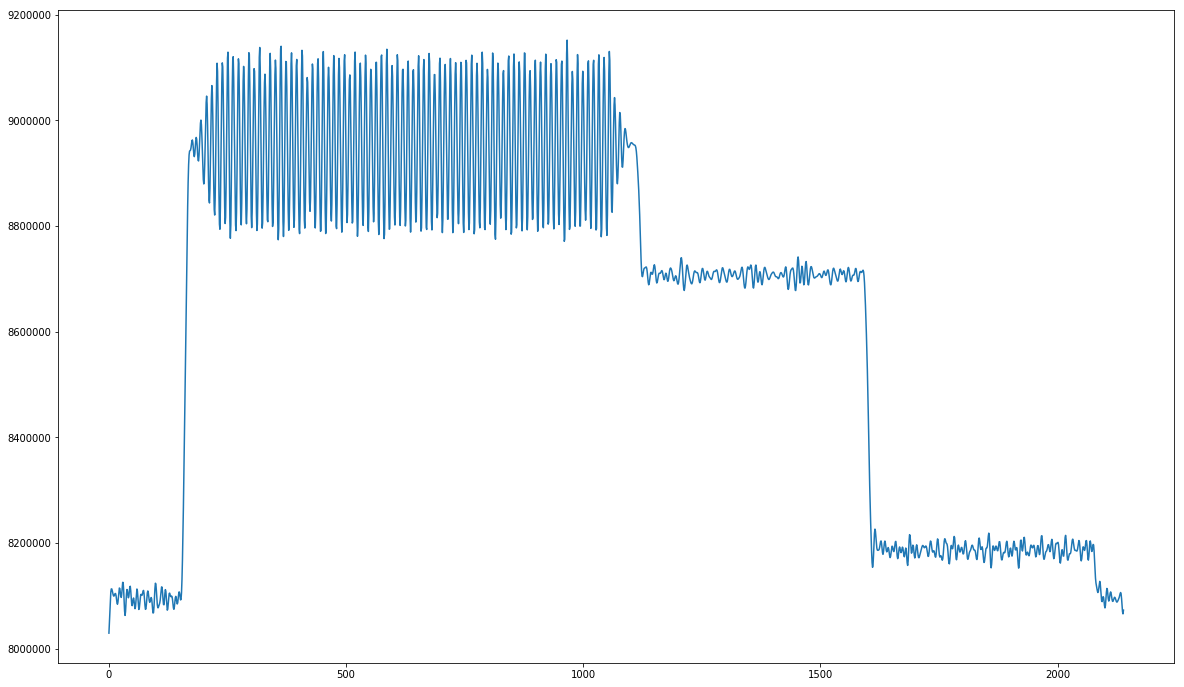

In [18]:
ls = self.lineslice(18, 8, 53.5)
plt.plot(self.data[0]['demod'][ls])

In [6]:
self.get_linefreq(18)

40.0005018350672

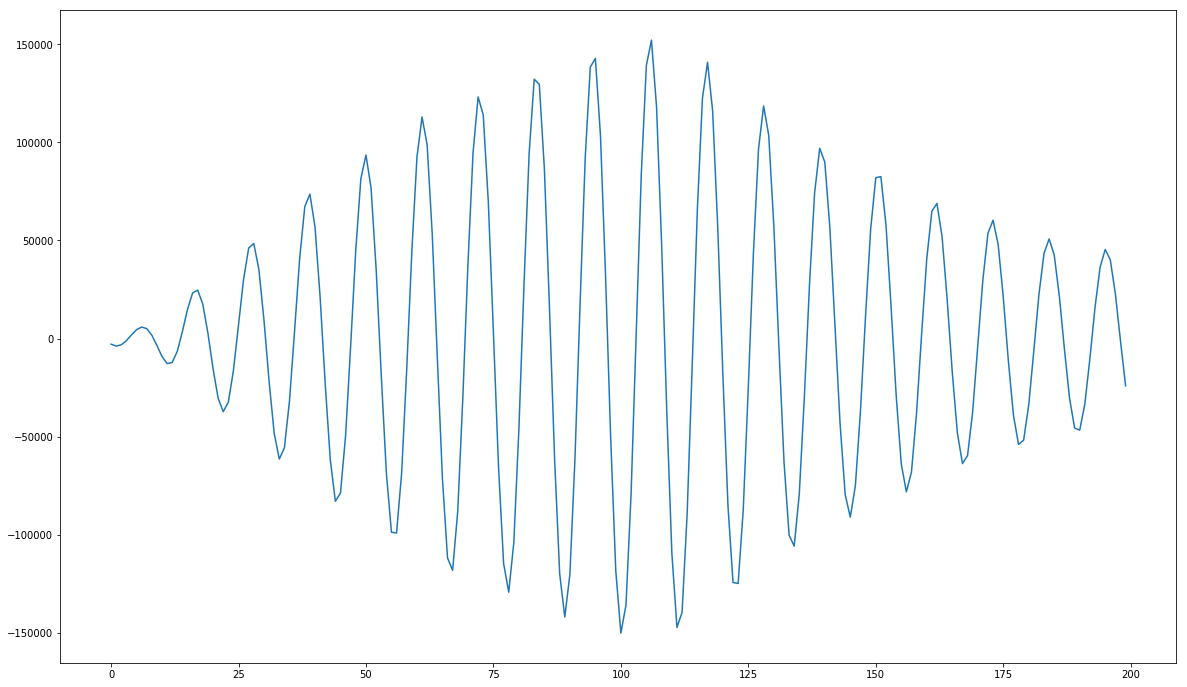

In [33]:
cburst = self.lineslice(18, 5.2, 5)
cburst_data = self.data[0]['demod_burst'][cburst]

plt.plot(self.data[0]['demod_burst'][cburst])

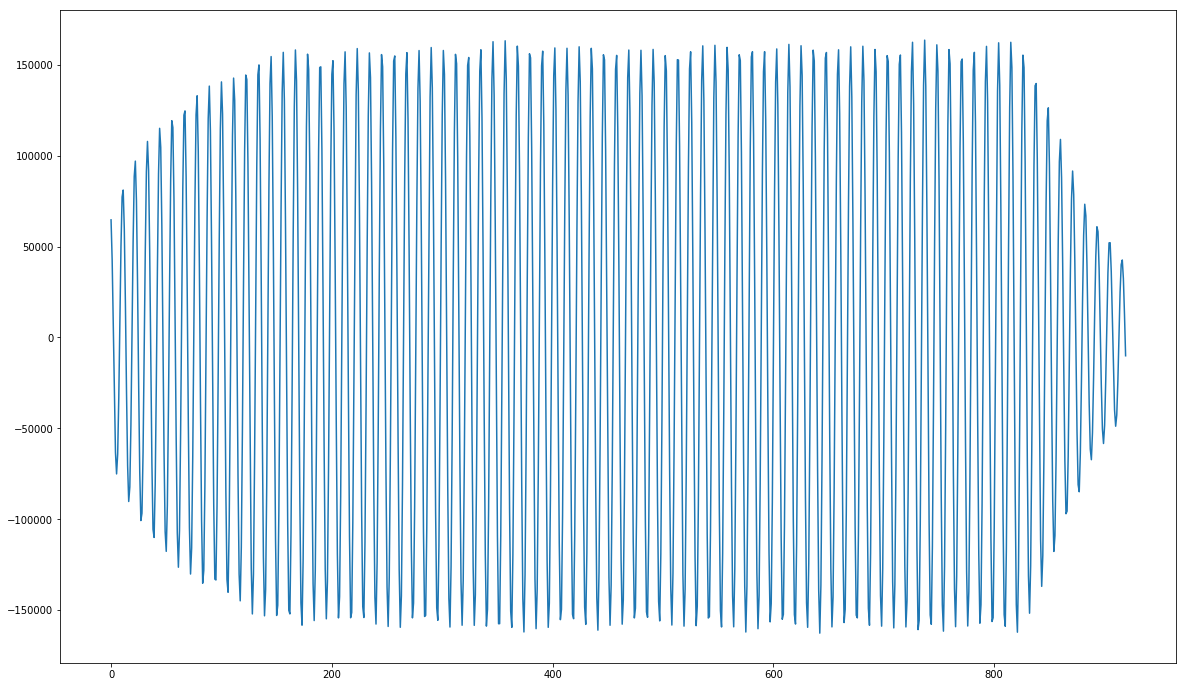

In [38]:
hburst = self.lineslice(18, 14, 23)
hburst_data = self.data[0]['demod_burst'][hburst]

plt.plot(self.data[0]['demod_burst'][hburst])

In [39]:
np.max(cburst_data), np.max(hburst_data)

(152130.28270043753, 163559.9514513027)

In [27]:
l19_bursts = self.data[0]['demod_burst'][bursts]

In [30]:
np.max(l19_bursts[0:200]), np.max(l19_bursts[400:1200])

(152130.28270043753, 163559.9514513027)

In [38]:
ldata = self.data[0]['demod_burst'][b:e]
#np.max(np.abs())

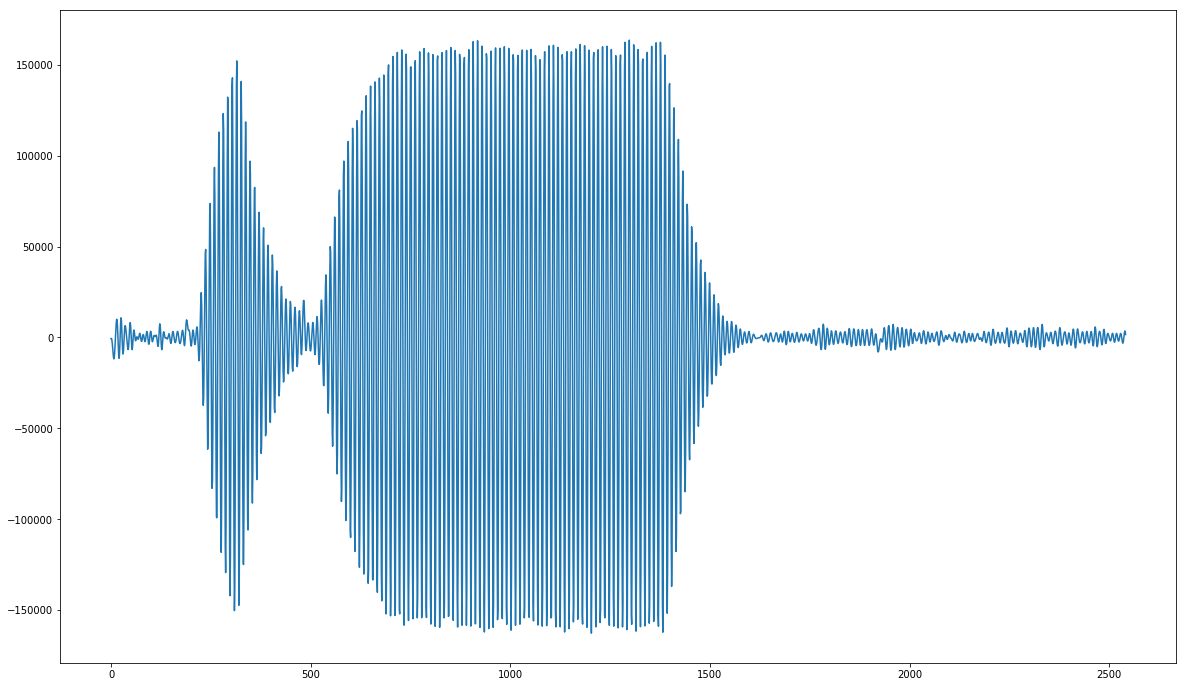

In [32]:
plt.plot(self.data[0]['demod_burst'][b:e])

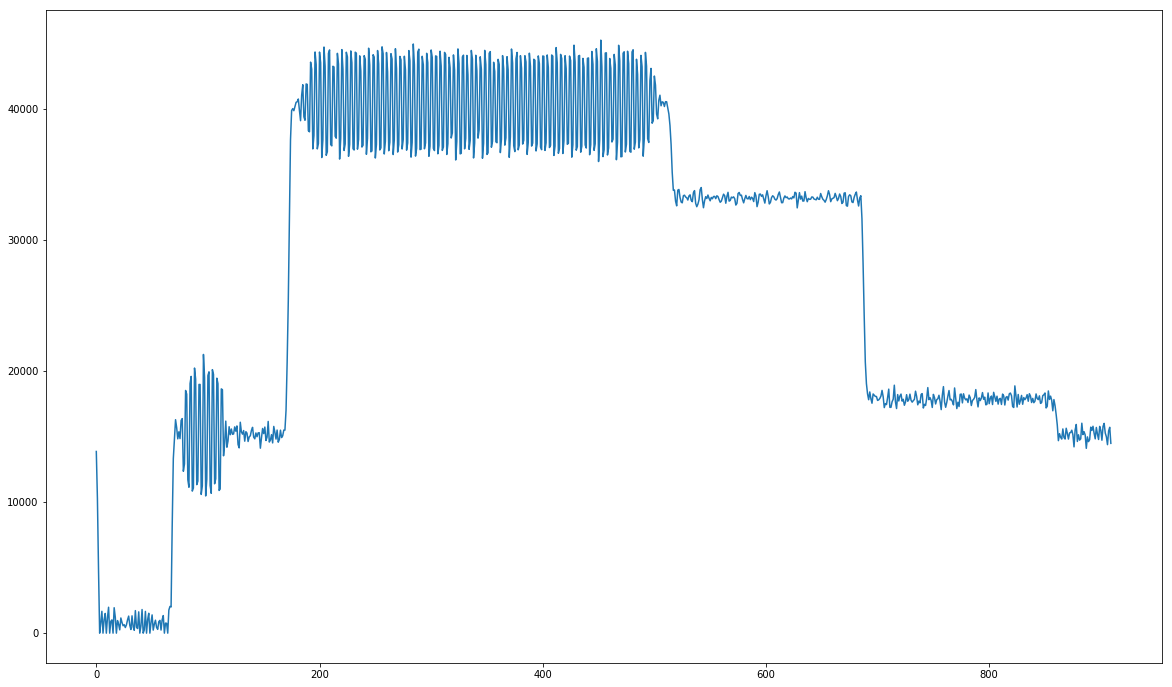

In [25]:
l = 18
plt.plot(self2.dspicture[l * self2.outlinelen:(l + 1) * self2.outlinelen])